In [ ]:
from re import X
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

#Reproductibilidad
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TensorFlow:", tf.__version__)

# 1. Cargar el dataset MNIST

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # mnist es un dataset de números

#Nota: En este ejercicio realizaremos las siguientes preguntas: Cuántas neuronas debo usar? Cuántas capas?

# Normalizar valores (0-255 -> 0-1)

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Aplanar imagenes (28*28 -> 784)

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

print("Shape train:", X_train.shape)
print("Shape test:", X_test.shape)

# Cuántas neuronas debo usar?
# En Churn teníamos 11 neuronas
# En Titanic teníamos 12 neuronas
# mnist 28*28 = 784 debido a que son imágenes
# Suelen depender del tamaño de la entrada. Entonces, la cantidad de neuronas debe ser igual a la cantidad de datos de entrada

# Podemos caer en 2 errores al asginar neuronas: subentrenamiento (< 70%) y sobreajuste (o memorizacion. > 95%)

#Estratégias comúnes para asignar neuronas por capas
# Usar la misma cantidad de la entrada
# Usar potencias de 2 (32, 64, 128)
# Ir reduciendo en las capas sucesivas (128, 64, 32)
# Usar menos o más neuronas para controlar el desajuste. El dropout también sirve para evitar el sobreajuste. Esto puede verse reflejado en el accuracy (muy alto)


# Cuántas capas debemos usar entonces?
# 2 - 3 para valores numéricos/textuales, más 3 para imágenes

# 2. Definir la red neuronal

model = models.Sequential([
    layers.Input(shape=(784,)),           # 784 Neuronas de entrada
    layers.Dense(128, activation="relu"), # Capa oculta 1
    layers.Dropout(0.2),                  # Regularización
    layers.Dense(64, activation="relu"),  # Capa oculta 2
    layers.Dropout(0.2),                  # Regularización
    layers.Dense(10, activation="softmax")#10 neuronas (clases 0-9)
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 3. Callbacks

cbs = [
    callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint("mnist_best.keras", monitor="val_accuracy",save_best_only=True)
]

# 4. Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=50,
    callbacks=cbs,
    verbose=1
)

# 5. Evaluación

y_pred = model.predict(X_test).argmax(axis=1)

print("\nReporte de clasificacion:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusion:\n", confusion_matrix(y_test, y_pred))



TensorFlow: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape train: (60000, 784)
Shape test: (10000, 784)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7506 - loss: 0.8075 - val_accuracy: 0.9563 - val_loss: 0.1529
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9300 - loss: 0.2347 - val_accuracy: 0.9672 - val_loss: 0.1076
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9505 - loss: 0.1682 - val_accuracy: 0.9710 - val_loss: 0.0931
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9588 - loss: 0.1397 - val_accuracy: 0.9727 - val_loss: 0.0892
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9653 - loss: 0.1162 - val_accuracy: 0.9737 - val_loss: 0.0808
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9699 - loss: 0.0998 - val_accuracy: 0.9767 - val_loss: 0.0755
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9737 - loss: 0.0890 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9754 - loss: 0.0789 - val_accuracy: 0

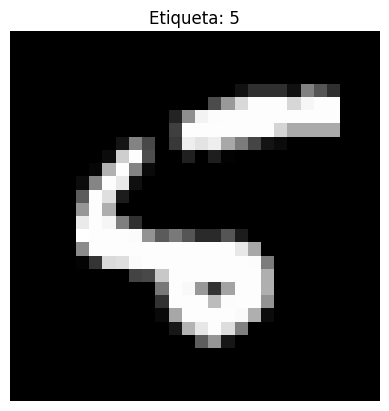

In [ ]:
import matplotlib.pyplot as plt

# Seleecionar a una iamgen de prueba
idx = 8
sample_image = X_test[idx].reshape(28, 28)
sample_label = y_test[idx]

# Mostrar imagen
plt.imshow(sample_image, cmap="gray")
plt.title(f"Etiqueta: {sample_label}")
plt.axis("off")
plt.show()



In [ ]:
# Preparar el dato para el modelo (reshape 1x784)
sample_input = X_test[idx].reshape(1, -1)

# Prediccion
pred_proba = model.predict(sample_input)
pred_class = pred_proba.argmax(axis=1)[0]

print(f"Etiqueta real: {sample_label}")
print(f"Probabilidad por clase: {pred_proba}")
print(f"Prediccion del modelo: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Etiqueta real: 5
Probabilidad por clase: [[9.0320151e-09 6.6717575e-08 8.5584425e-08 1.8620151e-08 1.0445123e-05
  3.8651991e-01 6.1215651e-01 1.9725910e-10 1.1371910e-03 1.7576442e-04]]
Prediccion del modelo: 6


Etiqueta real: 7, Prediccion del modelo: 7


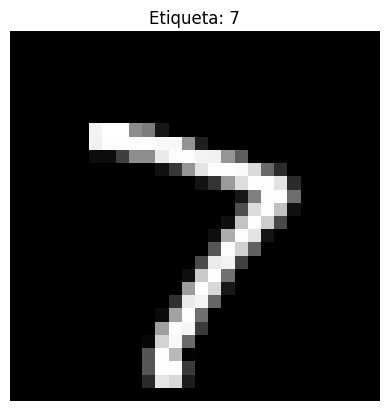

Etiqueta real: 8, Prediccion del modelo: 8


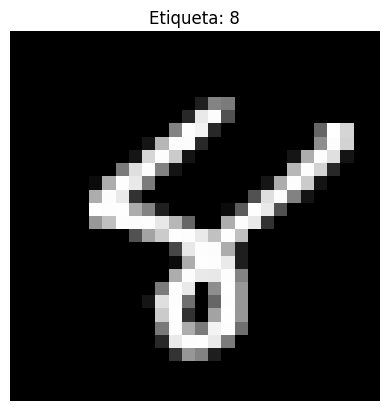

Etiqueta real: 2, Prediccion del modelo: 2


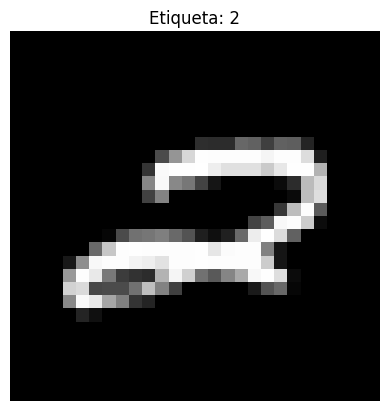

Etiqueta real: 1, Prediccion del modelo: 1


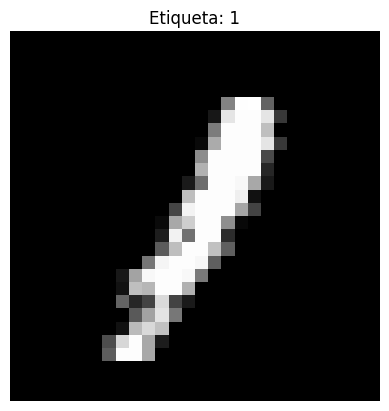

Etiqueta real: 8, Prediccion del modelo: 5


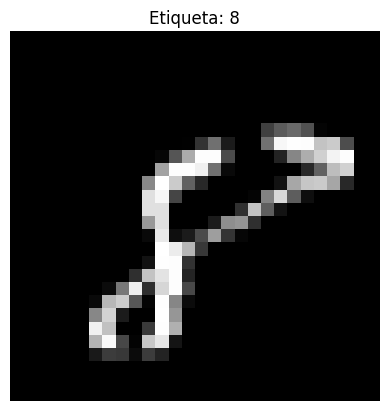

In [ ]:
# Generar números aleatorios y predecirlos según el dataset mnist

import random

random_indices = random.sample(range(len(X_test)), 5)

for idx in random_indices:
  sample_image = X_test[idx].reshape(28, 28)
  sample_label = y_test[idx]
  sample_input = X_test[idx].reshape(1, -1)

  pred_proba = model.predict(sample_input, verbose=0)
  pred_class = pred_proba.argmax(axis=1)[0]

  print(f"Etiqueta real: {sample_label}, Prediccion del modelo: {pred_class}")

  plt.imshow(sample_image, cmap="gray")
  plt.title(f"Etiqueta: {sample_label}")
  plt.axis("off")
  plt.show()

